# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

# 1)  Linear Regrssion on Housing Price

### Import packages and dataset

In [ ]:
# import numpy, pandas, matplotlib, seaborn
# add code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [ ]:
# add code here

df = pd.read_csv("./housing_data.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# add code here

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
# add code here

df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
10%,55047.633980,4.697755,5.681951,2.310000,23502.845262,7.720318e+05
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
90%,82081.188283,7.243978,8.274222,6.100000,48813.618633,1.684621e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [ ]:
# add code here

df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

<AxesSubplot:ylabel='Frequency'>

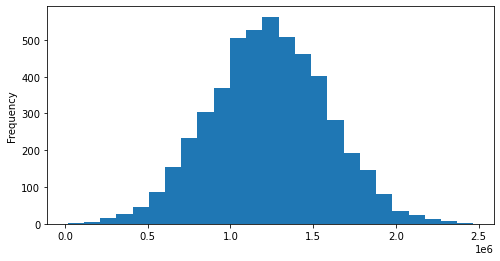

In [ ]:
# add code here

df['Price'].plot.hist(bins=25,figsize=(8,4))

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [ ]:
# add code here

df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [ ]:
# add code here

l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
X = df[l_column[0:len_feature-2]]
y = df[l_column[len_feature-2]]

In [ ]:
# This code should print (5000, 5) and (5000,) if everything is correct
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (5000, 5)
Variable set size: (5000,)


In [ ]:
# print a few record of X
# add code here

X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [ ]:
# print a few record of y
# add code here

y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [ ]:
# add code here

from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# add code here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
# add code here

print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (3500, 5)
Test feature set size: (1500, 5)
Training variable set size: (3500,)
Test variable set size: (1500,)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [ ]:
# add code here

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here

lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [ ]:
# add code here

lm.fit(X_train,y_train)

LinearRegression()

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [ ]:
# add code here

predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1500,)


**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

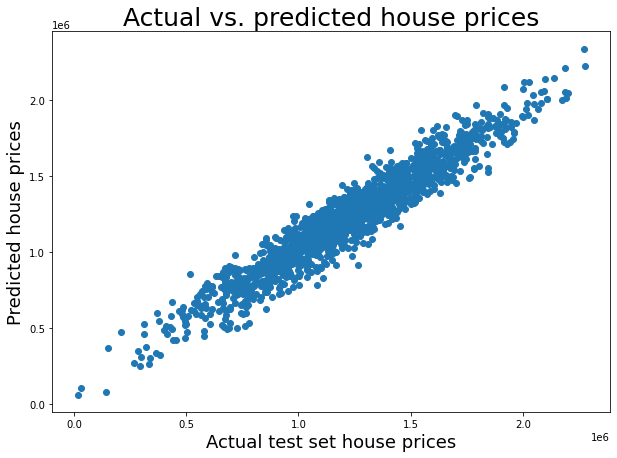

In [ ]:
# add code here

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [ ]:
# add code here

print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.919


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [ ]:
# import numpy, pandas, matplotlib, seaborn
# add code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [ ]:
# add code here

df = pd.read_csv("./classified_data.txt", index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# add code here

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
# add code here

df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [ ]:
# add code here

l=list(df.columns)

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

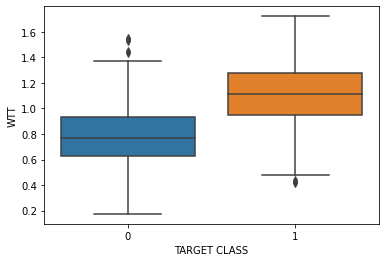

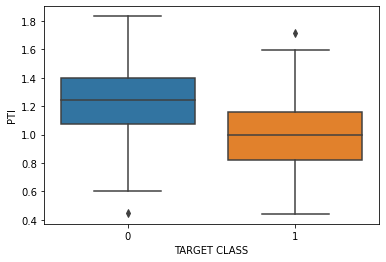

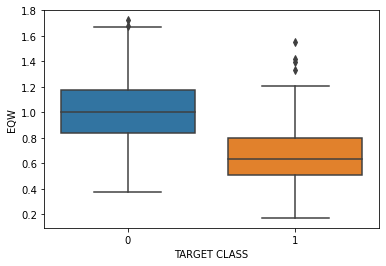

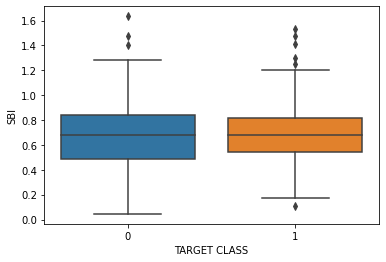

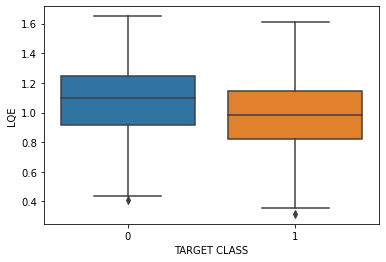

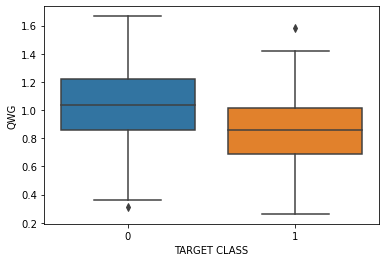

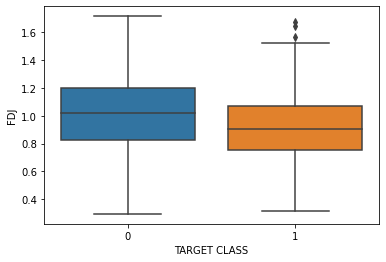

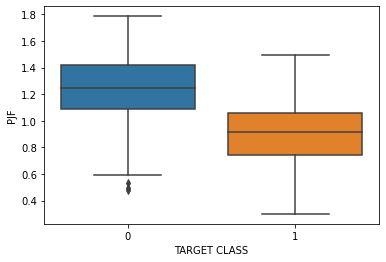

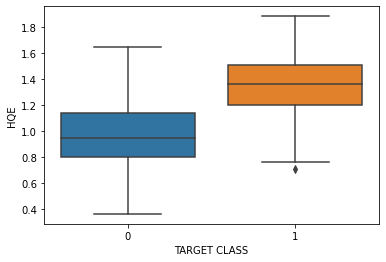

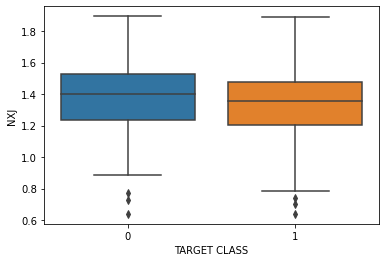

<Figure size 432x288 with 0 Axes>

In [ ]:
# add code here

for i in range(len(l)-1):
    sns.boxplot(x='TARGET CLASS',y=l[i], data=df)
    plt.figure()

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# add code here

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
# add code here

scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# add code here

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [ ]:
# add code here

X = df_feat
y = df['TARGET CLASS']

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# add code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], 
                                                    test_size=0.3, random_state=101)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [ ]:
# add code here

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# add code here

pred = knn.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# add code here

from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**Print the accuracy rate using numpy and roud it to 3 decimal places.**

In [ ]:
# add code here

print("Accuracy rate:",round(np.sum(pred==y_test)/len(pred),3))

Accuracy rate: 0.923


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which is gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy in a list

# add code here

accuracy = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(round(np.sum(pred_i==y_test)/len(pred_i),3))

**Plot a graph of K value vs Accuracy**

Text(0, 0.5, 'Accuracy Rate')

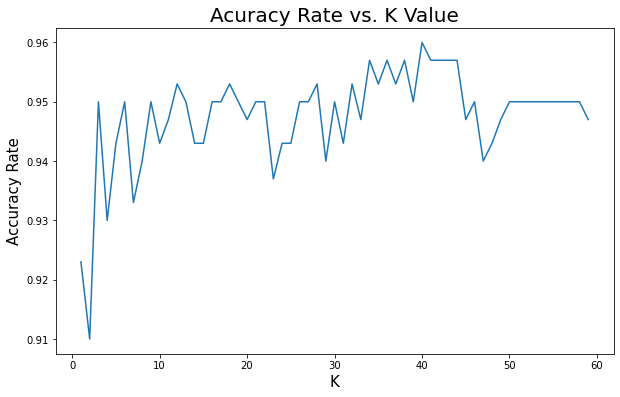

In [ ]:
# add code here

plt.figure(figsize=(10,6))
plt.plot(range(1,60),accuracy, markersize=8)
plt.title('Acuracy Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Accuracy Rate',fontsize=15)

**Choose the best value of n_neighbours and give a reason**

In [ ]:
# add code here 

# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
#write code here
df_titanic = pd.read_csv("/content/gdrive/MyDrive/synapse_w2/titanic_data.csv")

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [ ]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

In [ ]:
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe

  #creating title column
  title_list = []
  for i in df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
    
  df["Title"] = title_list

  #removing columns
  df = df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=False)

  #nan analysis
  df = df.drop(["Cabin"], axis=1, inplace=False)
  df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=False) 
  df["Age"] = df["Age"].fillna(df["Age"].mean(), inplace=False)

  #feature addition
  df["Family_members"] = df["SibSp"] + df["Parch"]
  df = df.drop(["SibSp", "Parch"], axis=1, inplace=False)

  #normalize
  df["Age"] = normalize(df["Age"])
  df["Fare"] = normalize(df["Fare"])
  df["Family_members"] = normalize(df["Family_members"])

  #one hot encode
  df = pd.get_dummies(df, columns=["Pclass", "Sex", "Title", "Embarked"])
  return df

In [ ]:
titanic_x = titanic_preprocessing_pipeline(df_titanic)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
#write code here
titanic_y = titanic_x["Survived"]

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
#write code here
titanic_x.drop(["Survived"], axis=1, inplace=True)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [ ]:
#write code here

#import
from sklearn.model_selection import train_test_split

titanic_x_train, titanic_x_test, titanic_y_train, titanic_y_test = train_test_split(titanic_x, titanic_y, test_size=0.3, random_state=4, shuffle=True)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

#### Trying out normal decision trees

In [ ]:
#write code here

#imports 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#helper functions
def train_dc(X_train, y_train, criterion, max_depth, min_samples_split, min_samples_leaf, max_features=None):
    clf = DecisionTreeClassifier(criterion = criterion,
            random_state = 100, max_depth = max_depth, min_samples_leaf = min_samples_leaf, 
            min_samples_split = min_samples_split, 
            max_features = max_features )
  
    # Performing training
    clf.fit(X_train, y_train)
    return clf


def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred


def cal_accuracy(y_test, y_pred):
    return accuracy_score(y_test,y_pred)*100


def populate_dict(c, i, j, k, mf, a1, a2):
  d = {}
  d["criterion"] = c
  d["max_depth"] = i 
  d["min_samples_split"] = j
  d["min_samples_leaf"] = k
  d["max_features"] = mf
  d["test_acc"] = a1
  d["train_acc"] = a2
  diff = a2-a1
  d["diff"] = diff
  return d

In [ ]:
#doing a grid search
#a grid search is where we try multiple values for hyperparameters and find the best one

#things to mote down : num_col = 28, num_rows = 

# max_depth_list = [5, 10, 15, 20]
# min_samples_split_list = [20, 40, 60]
# min_samples_leaf_list = [15, 30, 45]

max_depth_list = [5, 10, 20, 40, 60]
min_samples_split_list = [20, 40, 60, 80, 100]
min_samples_leaf_list = [15, 30, 45, 60, 75]
max_features = None

metric_list = []

#gini
for i in max_depth_list:
  for j in min_samples_split_list:
    for k in min_samples_leaf_list:
      #making the clf_obj
      clf_obj = train_dc(titanic_x_train, titanic_y_train, "gini", i, j, k)
      #predicting the test data using the clf obj
      y_pred_test = prediction(titanic_x_test, clf_obj)

      #seeing what prediction we get if we pass the training data in our trained model (this helps to detect overfitting as we will see later)
      y_pred_train = prediction(titanic_x_train, clf_obj)

      #finding accuracy on test set
      a1 = cal_accuracy(titanic_y_test, y_pred_test) #test_acc

      #finding accuracy on train set
      a2 = cal_accuracy(titanic_y_train, y_pred_train) #train_acc

      #populating dictionary for tracking purpose
      d = populate_dict("gini", i, j, k, None, a1, a2)
      metric_list.append(d)


#entropy
for i in max_depth_list:
  for j in min_samples_split_list:
    for k in min_samples_leaf_list:
      #making the clf_obj
      clf_obj = train_dc(titanic_x_train, titanic_y_train, "entropy", i, j, k)
      #predicting the test data using the clf obj
      y_pred_test = prediction(titanic_x_test, clf_obj)

      #seeing what prediction we get if we pass the training data in our trained model (this helps to detect overfitting as we will see later)
      y_pred_train = prediction(titanic_x_train, clf_obj)

      #finding accuracy on test set
      a1 = cal_accuracy(titanic_y_test, y_pred_test) #test_acc

      #finding accuracy on train set
      a2 = cal_accuracy(titanic_y_train, y_pred_train) #train_acc

      #populating dictionary for tracking purpose
      d = populate_dict("entropy", i, j, k, None, a1, a2)
      metric_list.append(d)

In [ ]:
#the diff key in the dictionary encapsulates overfitting. The closer to 0, the better.
#sorting here by diff
sorted(metric_list, key=lambda d : d["diff"], reverse=True)

[{'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},
 {'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},
 {'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 40,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},
 {'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 60,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},
 {'criterion': 'entropy',
  'diff': -1.824345367863728,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samp

In [ ]:
#sorting metric list by highest test accuracy

sorted(metric_list, key=lambda d : d["test_acc"], reverse=True)

[{'criterion': 'gini',
  'diff': -7.056611005965351,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 100,
  'test_acc': 87.31343283582089,
  'train_acc': 80.25682182985554},
 {'criterion': 'gini',
  'diff': -7.056611005965351,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 100,
  'test_acc': 87.31343283582089,
  'train_acc': 80.25682182985554},
 {'criterion': 'gini',
  'diff': -7.056611005965351,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 100,
  'test_acc': 87.31343283582089,
  'train_acc': 80.25682182985554},
 {'criterion': 'gini',
  'diff': -7.056611005965351,
  'max_depth': 40,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 100,
  'test_acc': 87.31343283582089,
  'train_acc': 80.25682182985554},
 {'criterion': 'gini',
  'diff': -7.056611005965351,
  'max_depth': 60,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_

- we are looking for a lower diff (closer to zero) and a higher test accuracy
- The results that support these conditions are

{'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>
 {'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 15,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>
 {'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>
 {'criterion': 'entropy',
  'diff': -1.824345367863728,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>
 {'criterion': 'entropy',
  'diff': -1.824345367863728,
  'max_depth': 15,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>
 {'criterion': 'entropy',
  'diff': -1.824345367863728,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>

  - We will hence choose the smallest tree out of this as all acuracy results are same.
  - therefore the selected tree is : 

  <br>

{'criterion': 'gini',
  'diff': -1.824345367863728,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'test_acc': 84.32835820895522,
  'train_acc': 82.5040128410915},<br><br>


#### Trying out Random Forest

In [ ]:
#write code here

#imports 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#helper functions
def train_rf(X_train, y_train, criterion, max_depth, min_samples_split, min_samples_leaf, n_estimators, max_features=None):
    clf = RandomForestClassifier(criterion = criterion,
            random_state = 100, max_depth = max_depth, min_samples_leaf = min_samples_leaf, 
            min_samples_split = min_samples_split, 
            max_features = max_features , n_estimators = n_estimators)
  
    # Performing training
    clf.fit(X_train, y_train)
    return clf


def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    return y_pred


def cal_accuracy(y_test, y_pred):
    return accuracy_score(y_test,y_pred)*100


def populate_dict(c, i, j, k, mf, a1, a2, n):
  d = {}
  d["n_estimators"] = n
  d["criterion"] = c
  d["max_depth"] = i 
  d["min_samples_split"] = j
  d["min_samples_leaf"] = k
  d["max_features"] = mf
  d["test_acc"] = a1
  d["train_acc"] = a2
  diff = a2-a1
  d["diff"] = diff
  return d

In [ ]:
#doing a grid search
#a grid search is where we try multiple values for hyperparameters and find the best one

#things to mote down : num_col = 28, num_rows = 

# max_depth_list = [5, 10, 15, 20]
# min_samples_split_list = [20, 40, 60]
# min_samples_leaf_list = [15, 30, 45]

max_depth_list = [5, 10, 20, 40, 60]
min_samples_split_list = [20, 40, 60, 80, 100]
min_samples_leaf_list = [15, 30, 45, 60, 75]
n_estimators_list = [50, 100, 150, 200]
max_features = None

metric_list = []

cnt = 0
#gini
for n in n_estimators_list:
  for i in max_depth_list:
    for j in min_samples_split_list:
      for k in min_samples_leaf_list:
        print(cnt)
        cnt+=1
        #making the clf_obj
        clf_obj = train_rf(titanic_x_train, titanic_y_train, "gini", i, j, k, n)
        #predicting the test data using the clf obj
        y_pred_test = prediction(titanic_x_test, clf_obj)

        #seeing what prediction we get if we pass the training data in our trained model (this helps to detect overfitting as we will see later)
        y_pred_train = prediction(titanic_x_train, clf_obj)

        #finding accuracy on test set
        a1 = cal_accuracy(titanic_y_test, y_pred_test) #test_acc

        #finding accuracy on train set
        a2 = cal_accuracy(titanic_y_train, y_pred_train) #train_acc

        #populating dictionary for tracking purpose
        d = populate_dict("gini", i, j, k, None, a1, a2, n)
        metric_list.append(d)


#entropy
for n in n_estimators_list:
  for i in max_depth_list:
    for j in min_samples_split_list:
      for k in min_samples_leaf_list:
        print(cnt)
        cnt+=1
        #making the clf_obj
        clf_obj = train_rf(titanic_x_train, titanic_y_train, "entropy", i, j, k, n)
        #predicting the test data using the clf obj
        y_pred_test = prediction(titanic_x_test, clf_obj)

        #seeing what prediction we get if we pass the training data in our trained model (this helps to detect overfitting as we will see later)
        y_pred_train = prediction(titanic_x_train, clf_obj)

        #finding accuracy on test set
        a1 = cal_accuracy(titanic_y_test, y_pred_test) #test_acc

        #finding accuracy on train set
        a2 = cal_accuracy(titanic_y_train, y_pred_train) #train_acc

        #populating dictionary for tracking purpose
        d = populate_dict("entropy", i, j, k, None, a1, a2, n)
        metric_list.append(d)

#wait for this to complete count till 999

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
#the diff key in the dictionary encapsulates overfitting. The closer to 0, the better.
#sorting here by diff
sorted(metric_list, key=lambda d : d["diff"], reverse=True)

[{'criterion': 'gini',
  'diff': -2.731127668239864,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 80,
  'n_estimators': 200,
  'test_acc': 85.07462686567165,
  'train_acc': 82.34349919743178},
 {'criterion': 'gini',
  'diff': -2.731127668239864,
  'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 80,
  'n_estimators': 200,
  'test_acc': 85.07462686567165,
  'train_acc': 82.34349919743178},
 {'criterion': 'gini',
  'diff': -2.731127668239864,
  'max_depth': 20,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 80,
  'n_estimators': 200,
  'test_acc': 85.07462686567165,
  'train_acc': 82.34349919743178},
 {'criterion': 'gini',
  'diff': -2.731127668239864,
  'max_depth': 40,
  'max_features': None,
  'min_samples_leaf': 30,
  'min_samples_split': 80,
  'n_estimators': 200,
  'test_acc': 85.07462686567165,
  'train_acc': 82.34349919743178},
 {'criterion': 'gini',
  'diff': -2.73112

In [ ]:
#sorting metric list by highest test accuracy

sorted(metric_list, key=lambda d : d["test_acc"], reverse=True)

[{'criterion': 'entropy',
  'diff': -3.7379315301502203,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'n_estimators': 100,
  'test_acc': 87.68656716417911,
  'train_acc': 83.94863563402889},
 {'criterion': 'entropy',
  'diff': -3.7379315301502203,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'n_estimators': 150,
  'test_acc': 87.68656716417911,
  'train_acc': 83.94863563402889},
 {'criterion': 'entropy',
  'diff': -3.7379315301502203,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'n_estimators': 200,
  'test_acc': 87.68656716417911,
  'train_acc': 83.94863563402889},
 {'criterion': 'entropy',
  'diff': -5.13044728204882,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 80,
  'n_estimators': 100,
  'test_acc': 87.31343283582089,
  'train_acc': 82.18298555377207},
 {'criterion': 'entropy',
  'd

{'criterion': 'entropy',
  'diff': -3.7379315301502203,
  'max_depth': 5,
  'max_features': None,
  'min_samples_leaf': 15,
  'min_samples_split': 20,
  'n_estimators': 100,
  'test_acc': 87.68656716417911,
  'train_acc': 83.94863563402889}

#### Trying out Adaboost
<b>This time we will use sklearn's implementation of gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100,140,145,150,160, 170,175,180,185];
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=10,
                                 n_jobs = -1)
grid_result = grid.fit(CC)
print(grid_result.best_score_)
print(grid_result.best_params_)

0.8009472606246799
{'learning_rate': 0.1, 'n_estimators': 140}


In [ ]:
clf = AdaBoostClassifier(base_estimator=None, learning_rate=0.1, n_estimators=140)
clf.fit(titanic_x_train, titanic_y_train)
y_pred = clf.predict(titanic_x_test)
accuracy_score(titanic_y_test, y_pred)

0.8283582089552238

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print("random forest")
{'criterion': 'entropy', 'diff': -3.7379315301502203, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 100, 'test_acc': 87.68656716417911, 'train_acc': 83.94863563402889}


random forest


{'criterion': 'entropy',
 'diff': -3.7379315301502203,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 15,
 'min_samples_split': 20,
 'n_estimators': 100,
 'test_acc': 87.68656716417911,
 'train_acc': 83.94863563402889}